In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

In [89]:
L = 8
MCS = 200000
temp = 2.4
def import_data(filename, MCS,N):
    return np.fromfile(filename,dtype = np.int32).reshape(MCS,N)

def autocorr(data):
    magn = data.T - np.mean(data, axis = 1)
    fft_magn = fft(magn)
    fft_magn[0] = 0
    chifft =np.abs(magn)**2
    autocorr = ifft(chifft)
    tau = np.mean(chifft[0]/autocorr[0])
    return np.real(autocorr.T),np.real(tau)

    

In [90]:
configs = import_data(f"dataIsing2D_L{L}/config_L{L}_T{temp:.3f}.bin",MCS,L**2)

In [91]:
ac_data,tau = autocorr(configs)
print(tau)

-3.41318324912074


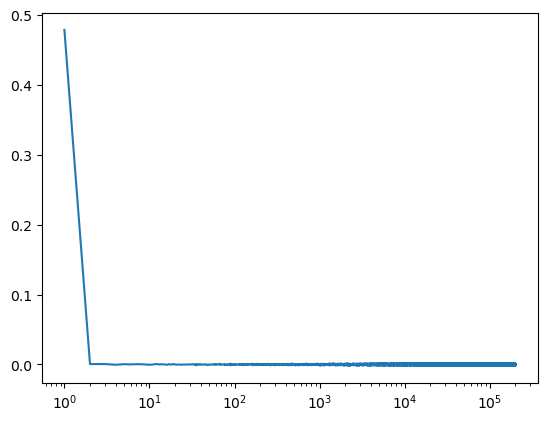

In [36]:
plt.plot([*range(1,1+MCS)],np.mean(ac_data,axis = 1))
plt.xscale("log")

(array([41315., 27494., 15902.,  8081.,  6430.,  7458.,  8213., 16057.,
        27597., 41453.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

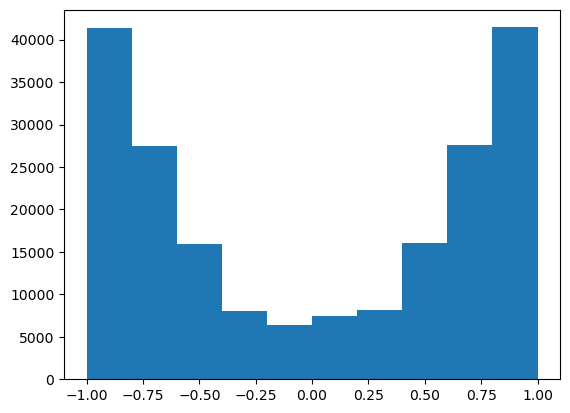

In [37]:
plt.hist(np.mean(configs,axis = 1))

In [137]:
def get_energy(data):
    en = np.zeros(data.shape[0],dtype = np.int32)
    N = data.shape[1]
    L = int(np.sqrt(N))
    #print(f"N = {N}, L = {L}")
    for i in range(2):
        
        nn = i +1
        if nn >= N:
            nn -= N
        nnsum = data[:,nn]

        nn = i -1
        if nn <0:
            nn += N
        nnsum += data[:,nn]

        nn = i +L
        if nn >= N:
            nn -= N
        nnsum += data[:,nn]

        nn = i -L
        if nn <0:
            nn += N
        nnsum += data[:,nn]
        #print(nnsum)
        en -= data[:,i]*nnsum
        
    return en/(2*N)

In [138]:
energy = get_energy(configs)


In [217]:
Ts = np.array([2.27,2.275,2.28,2.285,2.29,2.295,2.3])
L = 14

In [218]:
en = np.array([])
ensq = np.array([])
magnsq = np.array([])
magn = np.array([])
covmats = np.empty((len(Ts),L**2,L**2))
for i,temp in enumerate(Ts):
    configs = import_data(f"dataIsing2D_L{L}/config_L{L}_T{temp:.3f}.bin",MCS,L**2)
    energy = get_energy(configs)
    en = np.append(en,np.mean(energy))
    ensq = np.append(ensq,np.mean(energy**2))
    magn = np.append(magn,np.mean(np.mean(configs,axis = 1)))
    magnsq = np.append(magnsq,np.mean(np.mean(configs,axis = 1)**2))
    covmats[i] = np.cov(configs.T)

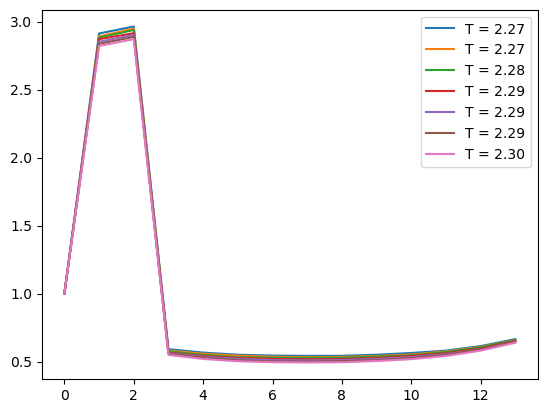

In [219]:
for i,temp in enumerate(Ts):
    plt.plot([*range(L)],covmats[i][:L,0],label = f"T = {temp:.2f}")
plt.legend()

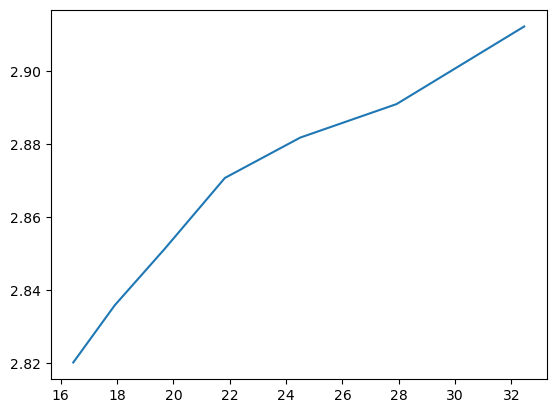

In [227]:
plt.plot((Ts-Tc+0.03)**(-1),covmats[:,1,0])
#plt.xlim([np.min((Ts-2/np.log(1+np.sqrt(2)))**-1)*0.95,50])
#plt.xscale("log")
#plt.yscale("log")

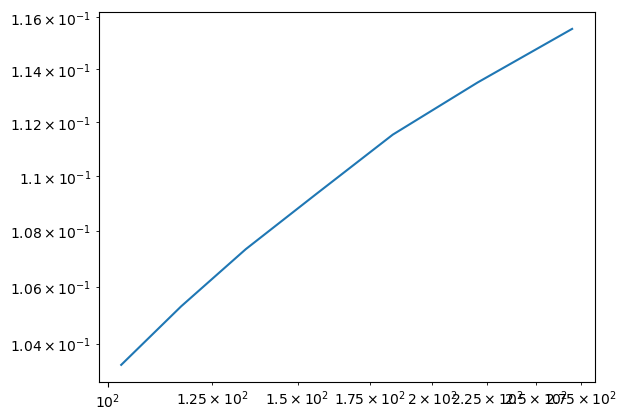

In [229]:
plt.plot((Ts-(Tc-0.04))**(-7/4),(magnsq-magn**2)/Ts**2)
#plt.xlim([np.min((Ts-2/np.log(1+np.sqrt(2)))**-1)*0.95,50])
plt.xscale("log")
plt.yscale("log")

In [197]:
def getBinder(data):
    return 1-np.mean(data**4)/(3*np.mean(data**2)**2)

In [206]:
Ls = np.array([8,10,14,20,36])
Ts = np.linspace(1.5,2.4,10)

In [207]:
binder = np.zeros((5,10))
for i,ls in enumerate(Ls):
    for j,ts in enumerate(Ts):
        configs = import_data(f"dataIsing2D_L{ls}/config_L{ls}_T{ts:.3f}.bin",MCS,ls**2)
        magn = np.mean(configs,axis =1)
        binder[i][j] = getBinder(magn)

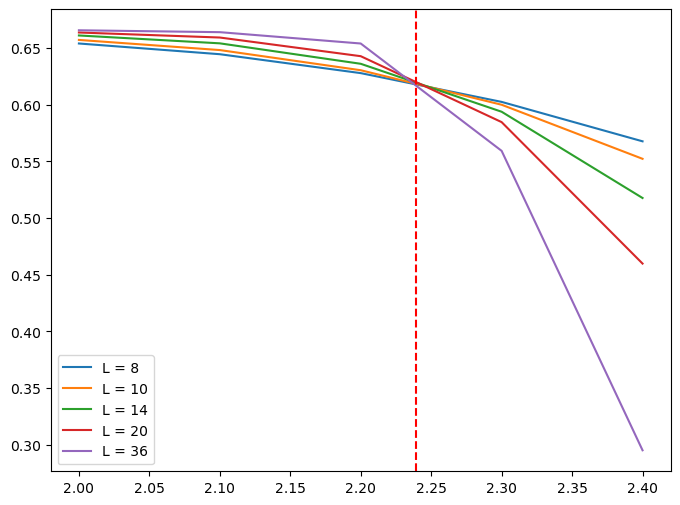

In [214]:
plt.figure(figsize = (8,6))
Tc = 2/np.log(1+np.sqrt(2))
for i,ls in enumerate(Ls):
    plt.plot((Ts[5:]),binder[i][5:],label = f"L = {ls}")
plt.legend()
plt.axvline(Tc-0.03,color = "red",linestyle = "--")

In [215]:
Tc-0.03

2.2391853142130222